# Syndrome measurements, an alternate view

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

In this notebook, we will further explore a technique to measure qubits, that we used before for the repetition and Shor codes. Recall, that there our goal was not to perform a destructive measurement of the entire state, but only a partial measurement that determined whether an error had occured on the state or not. Let's see if we can generalize this.

Suppose you have a qubit in some unknown state $\ket{\psi}$, and you want to measure operator $M$ on it. We will assume for simplicity $M$ has eigenvalues $\pm 1$, which is true for all Pauli operators.

To make our measurement, we are going to use an ancilla to store the results of our measurement. This is achieved with the following simple circuit.

![Non-destructive measurement](../../images/NonDestructiveMeasurement.png)

To see how this works, let's first look at an example.

### Non-destructive measurement of $Z$

Let $\ket{\psi}= \alpha\ket{0} + \beta\ket{1}$, and let $M=Z$ be the operator we want to measure. What is the expected result?

|measurement outcome|probability |post-measure state of qubit 0|
|:-----------------:|:----------:|:---------------------------:|
|       0           |$\lvert \alpha \rvert^2$|          $\ket{0}$          |
|       1           |$\lvert \beta\rvert^2$ |          $\ket{1}$          |


Now, to do this measurement, we append an ancilla to the state and execute the following circuit, where the $0$th qubit is the one being measured, and the $1$st qubit is the ancilla.

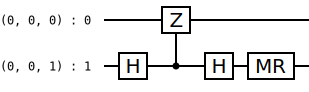

In [1]:
import stac
circ = stac.Circuit.simple(2)
circ.append('H', 1)
circ.append('CZ', 1, 0)
circ.append('H', 1)
circ.append('MR', 1)
circ.draw()

Let's work our way through this circuit (ignoring any normalization factors). First, 
\begin{align}
 \ket{\psi}\ket{0} &\stackrel{H}{\to} \ket{\psi}\ket{0} + \ket{\psi}\ket{1}, \\
                   &\stackrel{CZ_{10}}{\to} \ket{\psi}\ket{0} + (Z\ket{\psi})\ket{1}, \\
                   &\stackrel{H}{\to} \ket{\psi}(\ket{0}+\ket{1}) + (Z\ket{\psi})(\ket{0}-\ket{1}),\\
                   &= (\ket{\psi} + Z\ket{\psi})\ket{0} + (\ket{\psi} - Z\ket{\psi})\ket{1}, \\
                   &= (\alpha\ket{0} + \beta\ket{1} + \alpha\ket{0} - \beta\ket{1})\ket{0} + (\alpha\ket{0} + \beta\ket{1} - \alpha\ket{0} + \beta\ket{1})\ket{1}, \\
                   &= \alpha\ket{00} + \beta\ket{11}
\end{align}

At this point, if we measure the ancilla, then the outcomes are

|measurement outcome|probability |post-measure state of qubit 0|
|:-----------------:|:----------:|:---------------------------:|
|       0           |$\lvert \alpha\rvert ^2$|          $\ket{0}$          |
|       1           |$\lvert \beta\rvert^2$ |          $\ket{1}$          |

As we can see, this is exactly what we wanted.

*Question:* Insert the normalization factors into the circuit above and ensure the state remains normalized.

## Non-destructive measurements of $M$

### Case 1: $M$ is a one-qubit operator

In general, how does the mathematics work out. We have the circuit

![Non-destructive measurement](../../images/NonDestructiveMeasurement.png)

The state at the end of the circuit will be
\begin{align}
(\ket{\psi} + M\ket{\psi})\ket{0} + (\ket{\psi} - M\ket{\psi})\ket{1}
\end{align}

Let $M$ have an eigenbasis $\{\ket{e_0}, \ket{e_1}\}$, i.e.
\begin{align}
 M\ket{e_0} &= \ket{e_0}, \\
 M\ket{e_1} &= -\ket{e_1}. 
\end{align}

Then, if we expand $\ket{\psi} = \alpha\ket{e_0} + \beta\ket{e_1}$, the algebra is the same, 
\begin{align}
(\ket{\psi} + M\ket{\psi})\ket{0} + (\ket{\psi} - M\ket{\psi})\ket{1} &= (\alpha\ket{e_0} + \beta\ket{e_1} + \alpha\ket{e_0} - \beta\ket{e_1})\ket{0} + (\alpha\ket{e_0} + \beta\ket{e_1} - \alpha\ket{e_0} + \beta\ket{e_1})\ket{1}, \\
 &= \alpha\ket{e_00} + \beta\ket{e_11}.
\end{align}
Now, if we measure the ancilla, then outcomes are

|measurement outcome|probability |post-measure state of qubit 0  |
|:-----------------:|:----------:|:-----------------------------:|
|       0           |$\lvert \alpha\rvert^2$|          $\ket{e_0}$          |
|       1           |$\lvert \beta\rvert^2$ |          $\ket{e_1}$          |

In other words, measuring the ancilla in the computational basis has measured qubit 0 in the $M$ basis.

### Case 2: $M$ is a multi-qubit operator

Does this process work if we want to measure a multi-qubit state, using a multi-qubit Pauli operator? As an example, let $\ket{\psi}$ be a three-qubit state, and let $M = M_1\otimes M_2 \otimes M_3$. Again, we assume that each $M_i$ has eigenvalues $\pm 1$. Then, the circuit will be as follows.

![Non-destructive measurement-multi](../../images/NonDestructiveMeasurement-multi.png)

The condition on the eigenvalues of $M_i$ means that $M$ will also only have eigenvalues $\pm 1$. Hence, the mathematics will continue to hold (check if you are unconvinced) and measuring the syndrome qubits in the computational basis will be equivalent to measuring the data qubits in $M$ basis.

So, to measure, say $X_0Z_1$, we would implement the circuit below.

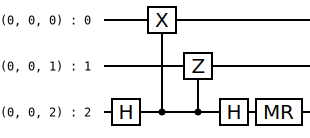

In [2]:
circ = stac.Circuit.simple(3)
circ.append('H', 2)
circ.append('CX', 2, 0)
circ.append('CZ', 2, 1)
circ.append('H', 2)
circ.append('MR', 2)
circ.draw()

## Measurement of eigenstates
One of the features of the measurement process described is that measuring an arbitrary operator on a state will destroy the superposition of the state (as governed by the rules of quantum mechanics). However, if the data qubits are in state $\ket{\psi}$. which is an eigenstate of the operator $M$, then there is no destruction.

Let's examine two possibilities for the state at the end of the circuit, but before measurement.
\begin{align}
\ket{\Phi} = (\ket{\psi} + M\ket{\psi})\ket{0} + (\ket{\psi} - M\ket{\psi})\ket{1},
\end{align}
where $\ket{\psi}$ is an $n$-qubit state and $M$ is any $n$-qubit Pauli operator.

### Case 1: +1 eigenstate.
If $M\ket{\psi} = \ket{\psi}$, then
\begin{equation}
 \ket{\Phi} = \ket{\psi}\ket{0}
\end{equation}
Then, the outcome of the measurement will be deterministically 0 and the state of the data qubits will be unchanged.

### Case 1: -1 eigenstate.
If $M\ket{\psi} = -\ket{\psi}$, then
\begin{equation}
 \ket{\Phi} = \ket{\psi}\ket{1}
\end{equation}
Then, the outcome of the measurement will be deterministically 1 and the state of the data qubits will be unchanged.

This analysis will be useful when we construct stabilizer quantum error-correction codes because the encoded state will always be an eigenstate of certain operators.


## The special case of $X$ and $Z$ operators
The circuit 

![Non-destructive measurement](../../images/NonDestructiveMeasurement.png)

doesn't look like anything we saw before. But if $M$ is $X$ or $Z$ then it can be transformed into a different circuit.


Recall the circuit identities:

1. $X$ conjugation by $H$
   
   ![X-conjugation](../../images/Xconjugation.png)
   
2. $Z$ conjugation by $H$
   
   ![Z-conjugation](../../images/Zconjugation.png)
   
3. $CX$ conjugation by $H$
   
   ![CX-conjugation](../../images/CXidentity.png)
   
   Here, if we apply identity 1 to the first qubit, we obtain
   
   ![CX-conjugation](../../images/CXidentity1.png)

### Repetition code for bit-flips

Recall that the syndrome circuit for the bit-flip repetition code was 

![repetition code syndrome](../../images/repetitioncodesyndrome.png)

Using the third identity above, we can see that it transforms to

![repetition code syndrome](../../images/repetitioncodesyndrome1.png)

Then, we use $HH = I$ to get 

![repetition code syndrome](../../images/repetitioncodesyndrome2.png)

Hence, we can see that in the repetition code, we are actually doing measurements of $Z \otimes Z \otimes I$ and $I \otimes Z \otimes Z$.

#### Task 1 (On paper)
What operators are being measured in the repetition code for phase-flips?